In [1]:
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as seaborn
#importanto os algoritmos
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
train = pandas.read_csv('input/train.csv')
test = pandas.read_csv('input/test.csv')

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pandas.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

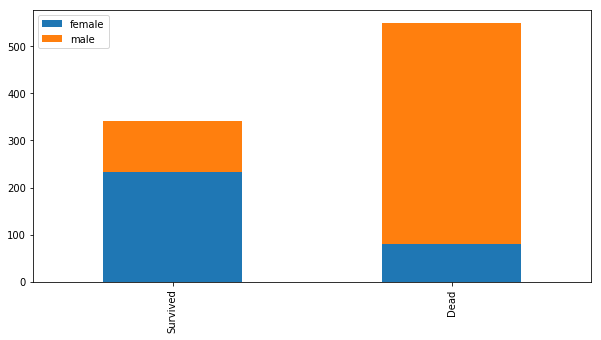

In [3]:
bar_chart('Sex')

In [4]:
train_test_data = [train, test]

In [5]:
for dataSet in train_test_data:
    dataSet['Title'] = dataSet['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [6]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Countess      1
Jonkheer      1
Don           1
Capt          1
Lady          1
Ms            1
Sir           1
Name: Title, dtype: int64

In [7]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [8]:
title = {"Mr": '0', "Miss": '1', "Mrs": '2', "Master":'3', "Dr": '3', "Rev" : '3',"Col" : '3',"Major" : '3' ,"Mlle" : '3',
         "Don": '3', "Countess" : '3', "Jonkheer" : '3', "Lady" : '3',"Mme" : '3', "Capt" : '3', "Sir" : '3', "Ms" :'3', "Dona": '3'}

for dataSet in train_test_data:
    dataSet['Title'] = dataSet['Title'].map(title)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [10]:
test.drop('Name', axis=1, inplace= True)
train.drop('Name', axis=1, inplace= True)

In [11]:
sex = {'male': 0, 'female': 1}
for dataSet in train_test_data:
    dataSet['Sex'] = dataSet['Sex'].map(sex)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [13]:
test['Age'].fillna(test.groupby('Title')["Age"].transform("median"), inplace = True)
train['Age'].fillna(train.groupby('Title')["Age"].transform("median"), inplace = True)

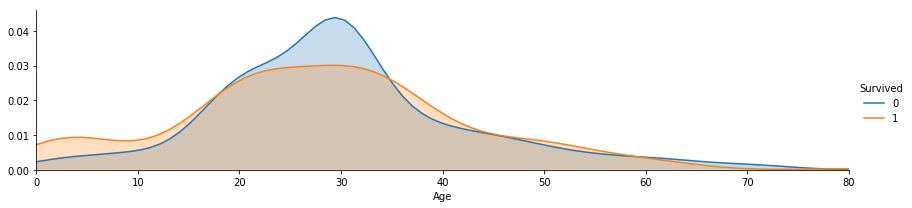

In [14]:
facet = seaborn.FacetGrid(train, hue="Survived", aspect=4)
facet.map(seaborn.kdeplot, 'Age', shade= True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.show()

In [15]:
for dataSet in train_test_data:
    dataSet.loc[dataSet['Age'] <= 16, 'Age'] = 0,
    dataSet.loc[(dataSet['Age'] > 16) & (dataSet['Age'] <= 26), 'Age'] = 1,
    dataSet.loc[(dataSet['Age'] > 26) & (dataSet['Age'] <= 36), 'Age'] = 2,
    dataSet.loc[(dataSet['Age'] > 36) & (dataSet['Age'] <= 62), 'Age'] = 3,
    dataSet.loc[dataSet['Age'] > 62, 'Age'] = 4

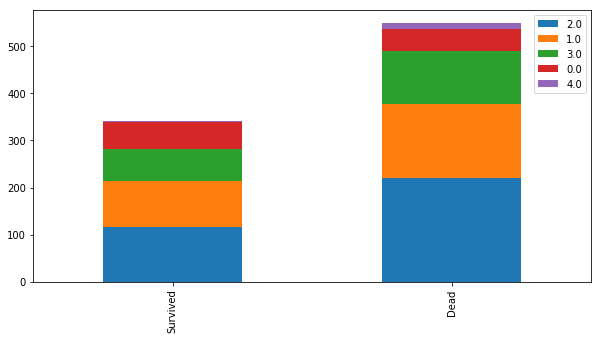

In [16]:
bar_chart('Age')

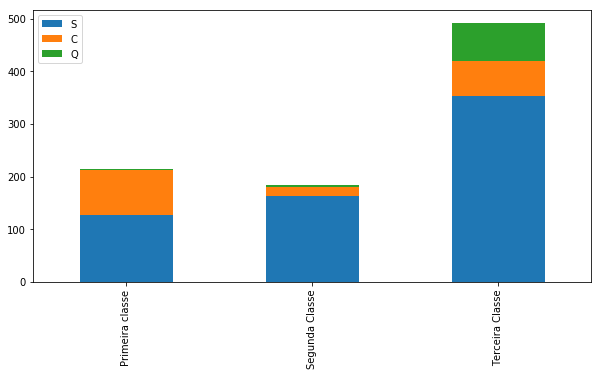

In [17]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pandas.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["Primeira classe", "Segunda Classe", "Terceira Classe"]
df.plot(kind = 'bar', stacked = True, figsize=(10,5))

In [18]:
for dataSet in train_test_data:
    dataSet['Embarked'] = dataSet['Embarked'].fillna('S')

In [19]:
embarked = {'S': 0, 'Q':1, 'C':2}
for dataSet in train_test_data:
    dataSet['Embarked'] = dataSet['Embarked'].map(embarked)

In [20]:
train['Fare'].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
test['Fare'].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)

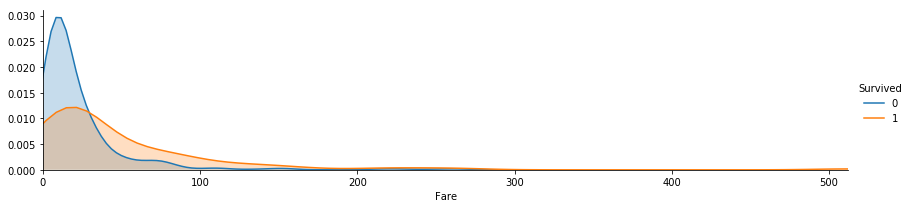

In [21]:
facet = seaborn.FacetGrid(train, hue="Survived", aspect=4)
facet.map(seaborn.kdeplot, 'Fare', shade= True)
facet.set(xlim =(0, train['Fare'].max()))
facet.add_legend()

plt.show()

In [22]:
for dataSet in train_test_data:
    dataSet.loc[dataSet['Fare'] <= 17, 'Fare'] = 0,
    dataSet.loc[(dataSet['Fare'] > 17) & (dataSet['Fare'] <= 30), 'Fare'] = 1,
    dataSet.loc[(dataSet['Fare'] > 30) & (dataSet['Fare'] <= 100), 'Fare'] = 2,
    dataSet.loc[(dataSet['Fare'] > 100), 'Fare'] = 3

In [23]:
for dataSet in train_test_data:
    dataSet['Cabin'] = dataSet['Cabin'].str[:1]

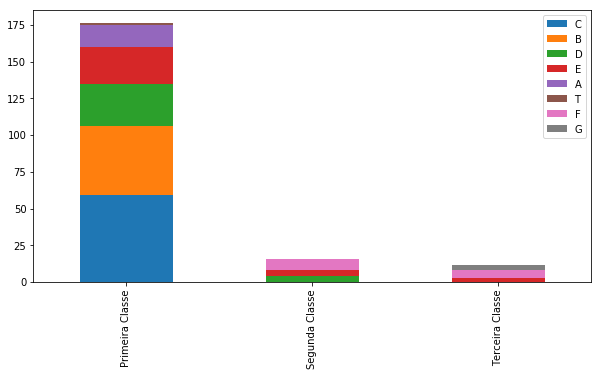

In [24]:
Pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()
df = pandas.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['Primeira Classe', 'Segunda Classe', 'Terceira Classe']
df.plot(kind='bar', stacked= True, figsize=(10,5))

In [25]:
cabines = {'A': 0.4, 'B':0.8, 'C':1.2, 'D':1.6, 'E':1.6, 'F':2,  'G':2.4, 'T':2.8}

for dataSet in train_test_data:
    dataSet['Cabin'] = dataSet['Cabin'].map(cabines)

In [26]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform("median"), inplace = True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform("median"), inplace = True)


In [27]:
for dataSet in train_test_data:
    dataSet['FamilySize'] = dataSet['SibSp'] + dataSet['Parch'] + 1


(0, 11.0)

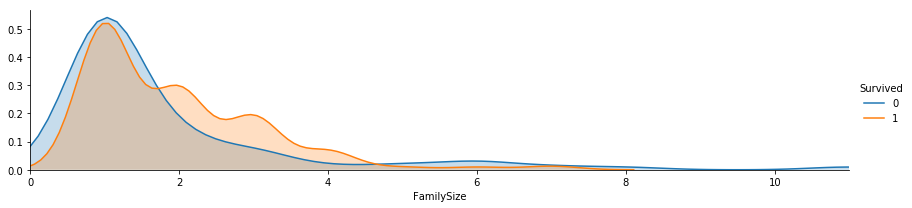

In [28]:
facet = seaborn.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(seaborn.kdeplot, 'FamilySize', shade = True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [29]:
drop = ['Parch', 'SibSp', 'Ticket','PassengerId']
train = train.drop(drop, axis = 1)
target = train['Survived']
train2 = train.drop(['Survived'], axis = 1)
train2.info()
drop = ['Parch', 'SibSp', 'Ticket']
test = test.drop(drop, axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null object
FamilySize    891 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB


In [30]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,1,0,1
1,893,3,1,3.0,0.0,2.0,0,2,2
2,894,2,0,3.0,0.0,2.0,1,0,1
3,895,3,0,2.0,0.0,2.0,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3


In [31]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null object
FamilySize    891 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB


In [32]:
divisoes = 10
embaralhado = True
random_state = 0
k_fold = KFold(divisoes, embaralhado, random_state)

In [33]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring= 'accuracy'
target = train['Survived']
score = cross_val_score(clf, train2, target, cv=k_fold, n_jobs=1,scoring=scoring)
print ('Score para KNeighbors')
score.mean()

Score para KNeighbors


0.8159425717852684

In [34]:
clf = SVC()
scoring= 'accuracy'
target = train['Survived']
score = cross_val_score(clf, train2, target, cv=k_fold, n_jobs=1,scoring=scoring)
print ('Score para SVM')
score.mean()

Score para SVM


0.8260549313358302

In [35]:
clf = DecisionTreeClassifier()
scoring= 'accuracy'
target = train['Survived']
score = cross_val_score(clf, train2, target, cv=k_fold, n_jobs=1,scoring=scoring)
print ('Score para DecisionTree')
score.mean()

Score para DecisionTree


0.7980024968789012

In [36]:
clf = RandomForestClassifier(n_estimators = 13)
scoring= 'accuracy'
target = train['Survived']
score = cross_val_score(clf, train2, target, cv=k_fold, n_jobs=1,scoring=scoring)
print ('Score para RandomForest')
score.mean()

Score para RandomForest


0.8024719101123596

In [37]:
clf = GaussianNB()
scoring= 'accuracy'
target = train['Survived']
score = cross_val_score(clf, train2, target, cv=k_fold, n_jobs=1,scoring=scoring)
print ('Score para GaussianNB')
score.mean()

Score para GaussianNB


0.7967915106117353

In [38]:
test_data = test.drop('PassengerId', axis=1).copy()

In [39]:
clf = DecisionTreeClassifier()
clf.fit(train2, target)
prediction = clf.predict(test_data)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null object
FamilySize    891 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 62.7+ KB


In [41]:
submission = pandas.DataFrame(
    {'PassengerId':test['PassengerId'],
     'Survived':prediction})

In [42]:
submission.to_csv('submissao.csv', index=False)

In [43]:
showing = pandas.read_csv('submissao.csv')

In [44]:
showing.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
